# Bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Carregando os arquivos para a análise

In [2]:
dados_compras_file = 'dados_compras.json'

In [3]:
df_compras = pd.read_json(dados_compras_file, orient = 'records', encoding = 'utf-8')
df_compras.head(10)

,Idade,Item ID,Login,Nome do Item,Sexo,Valor
0,38,165,Aelalis34,Bone Crushing Silver Skewer,Masculino,3.37
1,21,119,Eolo46,"Stormbringer, Dark Blade of Ending Misery",Masculino,2.32
2,34,174,Assastnya25,Primitive Blade,Masculino,2.46
3,21,92,Pheusrical25,Final Critic,Masculino,1.36
4,23,63,Aela59,Stormfury Mace,Masculino,1.27
5,20,10,Tanimnya91,Sleepwalker,Masculino,1.73
6,20,153,Undjaskla97,Mercenary Sabre,Masculino,4.57
7,29,169,Iathenudil29,"Interrogator, Blood Blade of the Queen",Feminino,3.32
8,25,118,Sondenasta63,"Ghost Reaver, Longsword of Magic",Masculino,2.77
9,31,99,Hilaerin92,"Expiration, Warscythe Of Lost Worlds",Masculino,4.53


In [4]:
#Alterando o nome da coluna "Item ID" para "Item_ID" e da coluna "Nome do Item" para "Nome_do_Item" para evitar futuros conflitos

df_compras.rename(columns = {'Item ID': 'Item_ID', 'Nome do Item': 'Nome_do_Item'}, inplace = True)

# Informações sobre os consumidores

In [5]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 6 columns):
Idade           780 non-null int64
Item_ID         780 non-null int64
Login           780 non-null object
Nome_do_Item    780 non-null object
Sexo            780 non-null object
Valor           780 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 27.5+ KB


# Análise geral de compras

In [6]:
#Quantidade de itens comprados uma única vez
itens_exclusivos = df_compras['Nome_do_Item'].unique()
itens_exclusivos.size

179

In [7]:
#Preço médio de compras
print('R$ %.2f' % round(df_compras['Valor'].mean(), 2))

R$ 2.93


In [8]:
#Quantidade total de compras
quantidade_total_compras = df_compras.shape[0]
quantidade_total_compras

780

In [9]:
#Rendimento total
rendimento_total = df_compras['Valor'].sum()
rendimento_total

2286.33

# Informações demográficas por gênero

In [10]:
#Porcentagem e contagem de compradores do sexo masculino
quant_compras_masc = list(df_compras['Sexo']).count('Masculino')
porc_compras_masc = quant_compras_masc/quantidade_total_compras

print("Porcentagem de compradores masculinos: %.2f %%" % porc_compras_masc)

Porcentagem de compradores masculinos: 0.81 %


In [11]:
#Porcentagem e contagem de compradores do sexo feminino
quant_compras_femi = list(df_compras['Sexo']).count('Feminino')
porc_compras_femi = quant_compras_femi/quantidade_total_compras

print("Porcentagem de compradoras femininas: %.2f %%" % porc_compras_femi)

Porcentagem de compradoras femininas: 0.17 %


In [12]:
#Porcentagem e contagem de compradores de sexo não divulgado
quant_compras_ND = list(df_compras['Sexo']).count('Outro / Não Divulgado')
porc_compras_ND = quant_compras_ND/quantidade_total_compras

print("Porcentagem de compradores do sexo não divulgado: %.2f %%" % porc_compras_ND)

Porcentagem de compradores do sexo não divulgado: 0.01 %


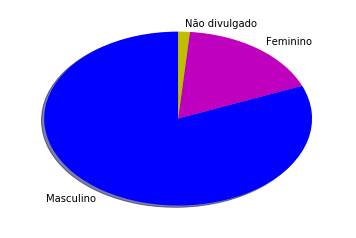

In [13]:
fatias = [porc_compras_masc, porc_compras_femi, porc_compras_ND]
legendas = ['Masculino', 'Feminino', 'Não divulgado']

plt.pie(fatias, labels = legendas, colors = ['b','m','y'], startangle = 90, shadow = True)
plt.show()

# Análise de compras por gênero

In [14]:
#Aqui criamos uma nova coluna (temporariamente) ao nosso dataframe, essa coluna será utilizada neste momento e também mais para frente
df_compras['Quantidade_de_Compras'] = 0

#Número de compras de cada gênero
num_compras_genero = df_compras.groupby('Sexo', as_index = False)['Quantidade_de_Compras'].count()
num_compras_genero

,Sexo,Quantidade_de_Compras
0,Feminino,136
1,Masculino,633
2,Outro / Não Divulgado,11


<BarContainer object of 3 artists>

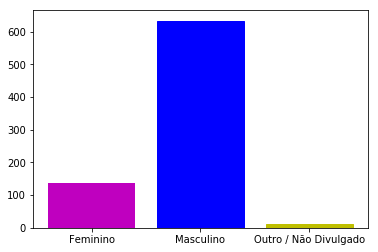

In [47]:
barlist = plt.bar(num_compras_genero['Sexo'], num_compras_genero['Quantidade_de_Compras'], color = 'm')
barlist[1].set_color('b')
barlist[2].set_color('y')
barlist

In [15]:
#Preço médio de compra de cada gênero
media_compras_generos = df_compras.groupby('Sexo', as_index = False)['Valor'].mean()
media_compras_generos

,Sexo,Valor
0,Feminino,2.815515
1,Masculino,2.950521
2,Outro / Não Divulgado,3.249091


<BarContainer object of 3 artists>

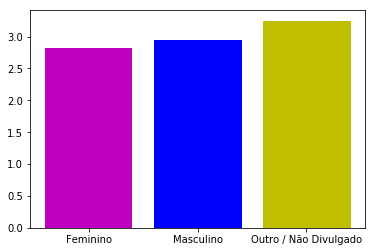

In [48]:
barlist = plt.bar(media_compras_generos['Sexo'], media_compras_generos['Valor'], label = 'Sexos', color = 'm')
barlist[1].set_color('b')
barlist[2].set_color('y')
barlist

In [16]:
#Valor total de compra de cada gênero
valor_total_genero = df_compras.groupby('Sexo', as_index = False)['Valor'].sum()
valor_total_genero

,Sexo,Valor
0,Feminino,382.91
1,Masculino,1867.68
2,Outro / Não Divulgado,35.74


In [17]:
#Compras por faixa etária e gênero
#Será usado o parâmetro do IBGE, Jovens de 0 a 19 anos, Adultos de 20 a 59 anos e Idosos com 60 ou mais
jovens = list(filter(lambda x : x <= 19, df_compras['Idade']))
adultos = list(filter(lambda x : (x >= 20) & (x <= 59), df_compras['Idade']))
idosos = list(filter(lambda x : x >= 60, df_compras['Idade']))

colunas = ['Idade', 'Valor']
df_idade_valor = df_compras[colunas]

df_jovens = df_idade_valor[df_idade_valor['Idade'] <= 19]
df_adultos = df_idade_valor[(df_idade_valor['Idade'] >= 20) & (df_idade_valor['Idade'] <= 59)]
df_idosos = df_idade_valor[df_idade_valor['Idade'] >= 60]

In [18]:
#JOVENS
print("Quantidade de jovens que compraram: %i" % len(jovens))
print("Média de valor comprado por jovens: R$ %.2f" % df_jovens['Valor'].mean())
print("Item de maior valor comprado por um jovem: R$ %.2f" % df_jovens['Valor'].max())

Quantidade de jovens que compraram: 196
Média de valor comprado por jovens: R$ 2.89
Item de maior valor comprado por um jovem: R$ 4.95


In [19]:
#ADULTOS
print("Quantidade de adultos que compraram: %i" % len(adultos))
print("Média de valor comprado por adultos: R$ %.2f" % df_adultos['Valor'].mean())
print("Item de maior valor comprado por um adulto: R$ %.2f" % df_adultos['Valor'].max())

Quantidade de adultos que compraram: 584
Média de valor comprado por adultos: R$ 2.94
Item de maior valor comprado por um adulto: R$ 4.95


In [20]:
#IDOSOS
print("Quantidade de idosos que compraram: %i" % len(idosos))
print("Média de valor comprado por idosos: R$ %.2f" % df_idosos['Valor'].mean())
print("Item de maior valor comprado por um idoso: R$ %.2f" % df_idosos['Valor'].max())

Quantidade de idosos que compraram: 0
Média de valor comprado por idosos: R$ nan
Item de maior valor comprado por um idoso: R$ nan


## Top 5 principais compradores pelo valor total de compra

In [21]:
#Criando um dataframe de Login e Valor total de compra
login_valor = df_compras[['Login', 'Valor']]

df_login = login_valor.groupby('Login', as_index = False)['Valor'].sum().sort_values(['Valor'], ascending = False)

df_login.columns = ['Login', 'Valor_total_de_compra']
df_login_top5 = df_login.head()

#Top 5 principais compradores pelo valor total de compra
df_login_top5.head()

,Login,Valor_total_de_compra
538,Undirrala66,17.06
428,Saedue76,13.56
354,Mindimnya67,12.74
181,Haellysu29,12.73
120,Eoda93,11.58


In [22]:
#Aqui vamos definir quantas compras cada login efetuou baseado na quantidade de vezes que o login aparece no dataframe
a = df_compras.groupby('Login', as_index = False)['Quantidade_de_Compras'].count()
#Feito isso, vamos colocar alocar a coluna Quantidade_de_Compras no objeto b
b = a['Quantidade_de_Compras']

In [23]:
#E agora, passamos a coluna Quantidade_de_Compras para o dataframe
df_compras['Quantidade_de_Compras'] = b

In [24]:
#Esse comando em especial serve para não aparecer um warning do pandas por conta da operação que vamos efetuar abaixo
pd.options.mode.chained_assignment = None

In [25]:
#Agora, para criar uma média de compra do Top 5 fazemos o seguinte:
coluna_valor = df_login_top5['Valor_total_de_compra']
coluna_login = list(df_login_top5['Login'])

quant_login_top5 = []

for i in coluna_login:
    logins = list(df_compras['Login'])
    quant_login_top5.append(logins.count(i))

df_login_top5['Media_de_Compra'] = coluna_valor.div(quant_login_top5)
df_login_top5['Quantidade_de_Compra'] = quant_login_top5

In [26]:
#Por fim, aqui está uma tabela com os dados que queríamos
df_login_top5.reset_index(drop = True)

,Login,Valor_total_de_compra,Media_de_Compra,Quantidade_de_Compra
0,Undirrala66,17.06,3.412000,5
1,Saedue76,13.56,3.390000,4
2,Mindimnya67,12.74,3.185000,4
3,Haellysu29,12.73,4.243333,3
4,Eoda93,11.58,3.860000,3


In [27]:
#Feito isso, podemos dropar a coluna Quantidade_de_Compra do df_compras
df_compras.drop('Quantidade_de_Compras', axis = 1, inplace = True)

# Top 5 itens mais populares por contagem de compras

In [28]:
#Itens mais comprados da loja
df_compras['Numero_de_Compras'] = 0
df_compras['Valor_Total'] = 0
df_itens = df_compras.groupby(['Item_ID', 'Nome_do_Item', 'Valor'], as_index = False)\
            ['Numero_de_Compras'].count().sort_values('Numero_de_Compras', ascending = False)

df_itens['Valor_Total_Compras'] = df_itens['Valor'] * df_itens['Numero_de_Compras']

df_itens.head().reset_index(drop = True)

,Item_ID,Nome_do_Item,Valor,Numero_de_Compras,Valor_Total_Compras
0,39,"Betrayal, Whisper of Grieving Widows",2.35,11,25.85
1,84,Arcane Gem,2.23,11,24.53
2,31,Trickster,2.07,9,18.63
3,175,Woeful Adamantite Claymore,1.24,9,11.16
4,13,Serenity,1.49,9,13.41


# Top 5 itens mais lucrativos

In [29]:
df_itens_lucrativos = df_compras[['Item_ID', 'Nome_do_Item', 'Valor', 'Numero_de_Compras', 'Valor_Total']].drop_duplicates()

In [30]:
df_itens_lucrativos = df_itens_lucrativos.sort_values(['Valor'], ascending = False).head()

In [49]:
itens_id_lucrativos = list(df_itens_lucrativos['Nome_do_Item'].head())

quant_itens_lucrativos = []

for i in itens_id_lucrativos:
    itens = list(df_compras['Nome_do_Item'])
    quant_itens_lucrativos.append(itens.count(i))

df_itens_lucrativos['Numero_de_Compras'] = quant_itens_lucrativos
df_itens_lucrativos['Valor_Total'] = df_itens_lucrativos['Valor'] * df_itens_lucrativos['Numero_de_Compras']
df_itens_lucrativos.reset_index(drop = True).sort_values(['Valor_Total'], ascending = False)

,Item_ID,Nome_do_Item,Valor,Numero_de_Compras,Valor_Total
0,32,Orenmir,4.95,6,29.70
2,103,Singed Scalpel,4.87,6,29.22
3,173,Stormfury Longsword,4.83,5,24.15
1,177,"Winterthorn, Defender of Shifting Worlds",4.89,4,19.56
4,42,The Decapitator,4.82,3,14.46


In [32]:
df_compras.drop(columns = ['Numero_de_Compras'], inplace = True)